In [ ]:
from google.colab import files
uploaded = files.upload()


Saving scaler_params.json to scaler_params.json
Saving state_labels.json to state_labels.json
Saving frames_with_states copy.json to frames_with_states copy.json
Saving frames_with_states copy 3.json to frames_with_states copy 3.json
Saving frames_with_states copy 2.json to frames_with_states copy 2.json
Saving frames_with_states2.json to frames_with_states2.json
Saving frames_with_states copy 4.json to frames_with_states copy 4.json
Saving frames_with_states_exercisev2.json to frames_with_states_exercisev2.json
Saving frames_with_states1.json to frames_with_states1.json
Saving frames_with_states.json to frames_with_states.json


TensorFlow Version: 2.18.0
Loading data...
Found 8 classes: ['curl_down', 'curl_up', 'pullup_down', 'pullup_up', 'pushup_down', 'pushup_up', 'squat_down', 'squat_up']
Scaler params loaded and sliced (Mean/Scale shape: (55,)/(55,))
Found training files: ['frames_with_states copy 3.json', 'frames_with_states_exercisev2.json', 'frames_with_states copy 2.json', 'frames_with_states.json', 'frames_with_states copy 4.json', 'frames_with_states copy.json', 'frames_with_states2.json', 'frames_with_states1.json']
  Loading frames_with_states copy 3.json...
  Loading frames_with_states_exercisev2.json...
  Loading frames_with_states copy 2.json...
  Loading frames_with_states.json...
  Loading frames_with_states copy 4.json...
  Loading frames_with_states copy.json...
  Loading frames_with_states2.json...
  Loading frames_with_states1.json...
Total frames loaded from all files: 239
Extracting features and labels (excluding orientation)...
Processed 239 samples.
Feature matrix shape: (239, 55)
Lab

Model: "pose_classifier_mlp_no_orientation"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_softmax (Dense)          │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,264 (32.28 KB)

 Trainable params: 8,264 (32.28 KB)

 Non-trainable params: 0 (0.00 B)

Compiling model...
Training model for 50 epochs...
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.1659 - loss: 2.2629 - val_accuracy: 0.3333 - val_loss: 1.8229
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2714 - loss: 1.8591 - val_accuracy: 0.4615 - val_loss: 1.6872
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2812 - loss: 1.8275 - val_accuracy: 0.5641 - val_loss: 1.5758
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4873 - loss: 1.5110 - val_accuracy: 0.6154 - val_loss: 1.4636
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4974 - loss: 1.5264 - val_accuracy: 0.6154 - val_loss: 1.3675
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5405 - loss: 1.3520 - val_accuracy: 0.6410 - val_loss: 1.2845
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5741 - loss: 1.2889 - val_accuracy: 0.6410 - val_loss: 1.2234
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5932 - loss


Test Loss: 0.4215
Test Accuracy: 0.8958
Saving trained model to pose_classifier_keras_no_orientation.h5...
Model saved successfully.


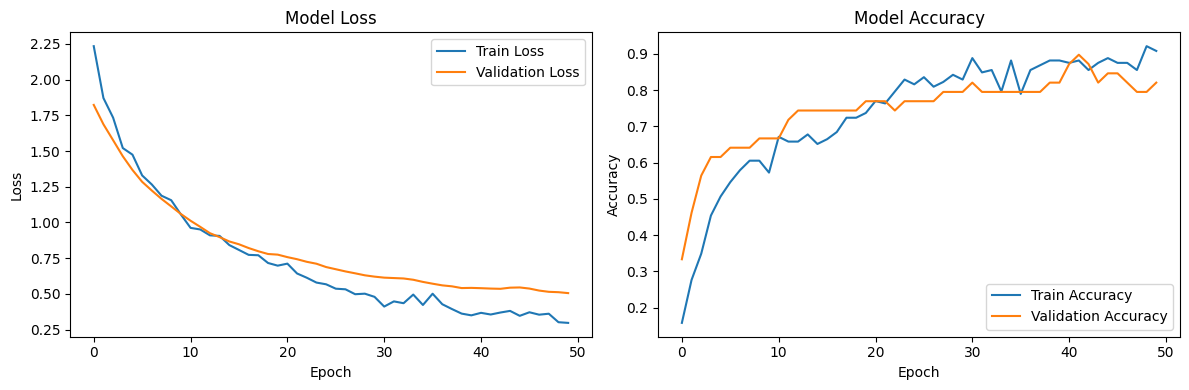

In [ ]:
import json
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd # Optional: For easier data inspection
import glob # <<< MODIFIED: Import glob to find files
import os   # <<< MODIFIED: To check file existence

print("TensorFlow Version:", tf.__version__)

# --- Configuration ---
# <<< MODIFIED: Use a pattern to find training files >>>
TRAINING_DATA_PATTERN = 'frames_*.json' # Adjust if your files have a different pattern
STATE_LABELS_FILE = 'state_labels.json'
SCALER_PARAMS_FILE = 'scaler_params.json'
# <<< Using the model trained *without* orientation features >>>
MODEL_SAVE_PATH = 'pose_classifier_keras_no_orientation.h5'
NUM_FEATURES = 55 # Using 55 features (excluding orientation)
NUM_EPOCHS = 50
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

# --- 1. Load Data ---
print("Loading data...")
# <<< MODIFIED: Load label map and scaler first >>>
try:
    if not os.path.exists(STATE_LABELS_FILE) or not os.path.exists(SCALER_PARAMS_FILE):
         raise FileNotFoundError("Ensure state_labels.json and scaler_params.json are present.")

    with open(STATE_LABELS_FILE, 'r') as f:
        label_map_str_idx = json.load(f)
        label_map_name_idx = {name: int(idx) for idx, name in label_map_str_idx.items()}
        num_classes = len(label_map_name_idx)
        print(f"Found {num_classes} classes: {list(label_map_name_idx.keys())}")
    with open(SCALER_PARAMS_FILE, 'r') as f:
        scaler_params = json.load(f)
        if len(scaler_params['mean']) >= NUM_FEATURES and len(scaler_params['scale']) >= NUM_FEATURES:
            scaler_mean = np.array(scaler_params['mean'][:NUM_FEATURES], dtype=np.float32)
            scaler_scale = np.array(scaler_params['scale'][:NUM_FEATURES], dtype=np.float32)
            scaler_scale[scaler_scale == 0] = 1e-6 # Handle zero scale
            print(f"Scaler params loaded and sliced (Mean/Scale shape: {scaler_mean.shape}/{scaler_scale.shape})")
        else:
            raise ValueError(f"Original scaler params length ({len(scaler_params['mean'])}) is less than new NUM_FEATURES ({NUM_FEATURES}).")

except FileNotFoundError as e:
    print(f"Error loading config file: {e}.")
    exit()
except Exception as e:
    print(f"Error processing config JSON files: {e}")
    exit()

# <<< MODIFIED: Find and load all training JSON files matching the pattern >>>
all_training_data = []
training_files_found = glob.glob(TRAINING_DATA_PATTERN)

if not training_files_found:
    print(f"Error: No training files found matching pattern '{TRAINING_DATA_PATTERN}'.")
    print("Make sure your training JSON files (e.g., frames_squats.json, frames_curls.json)")
    print("are in the same directory as the script and match the pattern.")
    exit()

print(f"Found training files: {training_files_found}")

for file_path in training_files_found:
    try:
        print(f"  Loading {file_path}...")
        with open(file_path, 'r') as f:
            data = json.load(f)
            if isinstance(data, list): # Expecting a list of frame objects
                 all_training_data.extend(data)
            else:
                 print(f"Warning: Expected a list in {file_path}, but got {type(data)}. Skipping file.")
    except FileNotFoundError:
        print(f"Error: File not found {file_path}")
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from {file_path}")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

if not all_training_data:
    print("Error: No data loaded from any training files.")
    exit()

print(f"Total frames loaded from all files: {len(all_training_data)}")


# --- 2. Feature Extraction & Preprocessing ---
print("Extracting features and labels (excluding orientation)...")
features = []
labels = []

# <<< MODIFIED: Iterate over the combined list >>>
for frame in all_training_data:
    raw_input = []
    # Keypoints (17 * 3 = 51 features)
    keypoints = frame.get('keypoints', [])
    for i in range(17):
        if i < len(keypoints) and keypoints[i]:
            kp = keypoints[i]
            raw_input.extend([kp.get('x', 0), kp.get('y', 0), kp.get('score', 0)])
        else:
            raw_input.extend([0, 0, 0])

    # Angles (4 features)
    angles = frame.get('angles', {})
    raw_input.extend([
        angles.get('leftElbow', 0),
        angles.get('rightElbow', 0),
        angles.get('leftKnee', 0),
        angles.get('rightKnee', 0)
    ])

    # Orientation feature is excluded (NUM_FEATURES = 55)

    # Check feature length
    if len(raw_input) == NUM_FEATURES:
        # Apply Scaling/Normalization
        scaled_input = (np.array(raw_input, dtype=np.float32) - scaler_mean) / scaler_scale
        features.append(scaled_input)
        # Convert state name label to numerical index
        state_name = frame.get('state')
        if state_name in label_map_name_idx:
            labels.append(label_map_name_idx[state_name])
        else:
            print(f"Warning: Unknown state '{state_name}' in frame. Skipping.")
            features.pop()
    else:
        print(f"Warning: Incorrect feature length ({len(raw_input)} vs {NUM_FEATURES}) for frame. Skipping.")


X = np.array(features, dtype=np.float32)
y = np.array(labels, dtype=np.int32)

if len(X) == 0 or len(y) == 0:
    print("Error: No valid features or labels extracted. Check data format and state names.")
    exit()

print(f"Processed {len(X)} samples.")
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)
print("Label distribution:", pd.Series(y).value_counts().sort_index())

# --- 3. Split Data ---
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# --- 4. Define Keras Model ---
print("Defining Keras model...")
model = keras.Sequential(
    [
        keras.Input(shape=(NUM_FEATURES,), name="input_features"), # Shape is 55
        layers.Dense(64, activation="relu", name="dense_1"),
        layers.Dropout(0.3),
        layers.Dense(64, activation="relu", name="dense_2"),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax", name="output_softmax"),
    ],
    name="pose_classifier_mlp_no_orientation",
)
model.summary()

# --- 5. Compile Model ---
print("Compiling model...")
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
)

# --- 6. Train Model ---
print(f"Training model for {NUM_EPOCHS} epochs...")
history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_split=VALIDATION_SPLIT,
    verbose=1
)

# --- 7. Evaluate Model ---
print("Evaluating model on test data...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# --- 8. Save Model ---
print(f"Saving trained model to {MODEL_SAVE_PATH}...")
try:
    model.save(MODEL_SAVE_PATH)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving model: {e}")

# --- Optional: Plot training history ---
try:
    import matplotlib.pyplot as plt

    def plot_history(history):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        ax1.plot(history.history['loss'], label='Train Loss')
        ax1.plot(history.history['val_loss'], label='Validation Loss')
        ax1.set_title('Model Loss')
        ax1.set_ylabel('Loss')
        ax1.set_xlabel('Epoch')
        ax1.legend(loc='upper right')

        ax2.plot(history.history['accuracy'], label='Train Accuracy')
        ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
        ax2.set_title('Model Accuracy')
        ax2.set_ylabel('Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.legend(loc='lower right')
        plt.tight_layout()
        plt.show()

    plot_history(history)
except ImportError:
    print("\nMatplotlib not found. Skipping history plot. Install with 'pip install matplotlib'")
except Exception as e:
    print(f"\nError plotting history: {e}")

In [ ]:
import tensorflow as tf

# --- Configuration ---
KERAS_MODEL_PATH = 'pose_classifier_keras_no_orientation.h5'
TFLITE_MODEL_SAVE_PATH = 'pose_classifier_no_orientation.tflite'

# --- Load Keras Model ---
print(f"Loading Keras model from {KERAS_MODEL_PATH}...")
try:
    model = tf.keras.models.load_model(KERAS_MODEL_PATH)
    print("Keras model loaded successfully.")
except Exception as e:
    print(f"Error loading Keras model: {e}")
    exit()

# --- Convert to TensorFlow Lite ---
print("Converting model to TensorFlow Lite...")
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    # Optional: Add optimizations (e.g., float16 quantization)
    # converter.optimizations = [tf.lite.Optimize.DEFAULT]
    # converter.target_spec.supported_types = [tf.float16]

    tflite_model = converter.convert()
    print("Conversion successful.")
except Exception as e:
    print(f"Error during TFLite conversion: {e}")
    exit()

# --- Save the TFLite Model ---
print(f"Saving TFLite model to {TFLITE_MODEL_SAVE_PATH}...")
try:
    with open(TFLITE_MODEL_SAVE_PATH, 'wb') as f:
        f.write(tflite_model)
    print("TFLite model saved successfully.")
except Exception as e:
    print(f"Error saving TFLite model: {e}")

Loading Keras model from pose_classifier_keras_no_orientation.h5...
Keras model loaded successfully.
Converting model to TensorFlow Lite...
Saved artifact at '/tmp/tmpbr9ehylt'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 55), dtype=tf.float32, name='input_features')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  140534791538832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140534791539600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140534791540368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140534791542096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140534791540176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140534791543248: TensorSpec(shape=(), dtype=tf.resource, name=None)
Conversion successful.
Saving TFLite model to pose_classifier_no_orientation.tflite...
TFLite model saved successfully.
